<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicios de Regresión

Ejemplo de regresión utilizando el dataset recolecado de pesos y estaturas de personas<br>

[Dataset source](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights)

v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [2]:
if os.access('weight_height.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv > weight_height.csv
    else:
        !wget weight_height.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  418k  100  418k    0     0   869k      0 --:--:-- --:--:-- --:--:--  871k


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [5]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
data = pd.read_csv('weight_height.csv')
data
# en mi caso no me hace falta ver atravez de codigo si hay datos faltantes porque instale la extenciòn Data Wrangler.

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [6]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes
data.dropna(inplace=True)

In [7]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [12]:
# Alumno: copie los datos a un nuevo dataset (df2), pero ahora transforme las columnas en 
# peso --> proveniente de Weight, debe pasar de libras a kilobramos
# altura --> proveniente de Height, debe pasar de pulgadas a metros
# sexo --> masculino (proveniente de Male) y femenino (proveniente de Female)
df2 = data.copy()

In [13]:
df2['Weight'] = df2['Weight'] * 0.453592
df2['Height'] = df2['Height'] * 0.0254
df2['Gender'] = df2['Gender'].map({'Male':'masculino','Female':'femenino'})

In [16]:
# Fin de la limpieza, alumno especifique cuantas filas se poseen para analizar
df2

,Gender,Height,Weight
0,masculino,1.875714,109.720985
1,masculino,1.747060,73.622732
2,masculino,1.882397,96.497550
3,masculino,1.821967,99.809504
4,masculino,1.774998,93.598619
...,...,...,...
9995,femenino,1.680785,62.041159
9996,femenino,1.703506,77.504315
9997,femenino,1.622247,58.275377
9998,femenino,1.753470,74.322166


In [20]:
x_masculino = df2[df2['Gender']=='masculino'].Height.values
y_masculino = df2[df2['Gender']=='masculino'].Weight.values
x_femenino = df2[df2['Gender']=='femenino'].Height.values
y_femenino = df2[df2['Gender']=='femenino'].Weight.values

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [ ]:
# Alumno graficar el peso (y) en función de la altura (x) pero para ambos sexos por separados
# Se debe realizar todo en un mismo "ax", cada scatter plot con diferente color para ver los dos grupos

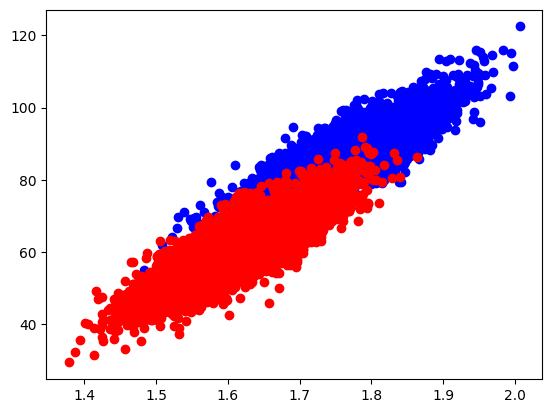

In [25]:
plt.scatter(x=x_masculino,y=y_masculino,c='b')
plt.scatter(x=x_femenino,y=y_femenino, c='r')
plt.show()

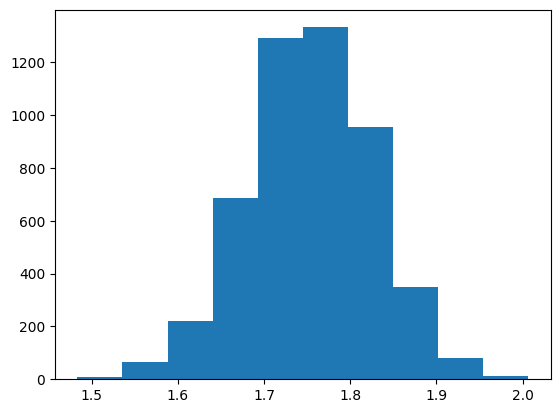

In [27]:
# Alumno: Dibujar la distribucion (histograma) de la altura en hombres
# Además, imprimir en pantalla el valor medio

plt.hist(x=x_masculino)
plt.show()

In [28]:
x_masculino.mean()

1.7532691860179221

c:\Users\Win10\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


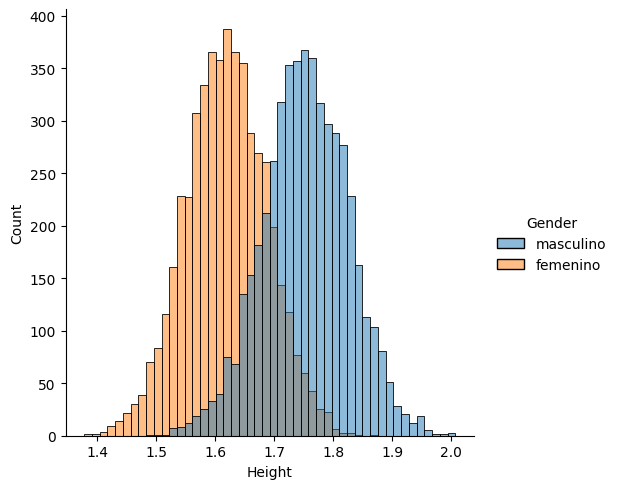

In [30]:
# Alumno: porque no prueba la función displot de seaborn que acepta
# "colorear" según la categoría deseada.
# Ingresar parámetros= data=df2, x="altura", hue="sexo"
sns.displot(data=df2,x='Height',hue='Gender')

# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Alumno:<br>
Para esta regresión se utilizará como variable de entrada el peso (X) y como salida la altura (y). Crear el modelo de regresión lineal que sea de su agrado o invierta las variables de salida y entrada si así lo prefiere. Debe elegir trabajar con los datos de sexo masculino o femenino, o duplicar el trabajo y realizar ambos.<br>
Pasor a seguir:
- Obtener las variables X e y (para masculino y/o femenino)
- Dividir el dataset en train y test 70%30%
- Entrenar un modelo de regresión
- Calcular la métrica r2_score del modelo (y_hat vs y_test)
- Dibujar el resultado de la regresion sobre los datos de entrada


In [35]:
from sklearn.model_selection import train_test_split

x_masculino_train,x_masculino_test,y_masculino_train,y_masculino_test = train_test_split(x_masculino.reshape(-1,1),y_masculino,test_size=0.3,random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression
lr_masculino= LinearRegression()

In [40]:
lr_masculino.fit(x_masculino_train,y_masculino_train)

LinearRegression()

In [42]:
y_masculino_prueba = lr_masculino.predict(x_masculino_test)

In [43]:
from sklearn.metrics import r2_score
r2_score(y_masculino_test,y_masculino_prueba)

0.7471339794726173

In [48]:
df2

,Gender,Height,Weight
0,masculino,1.875714,109.720985
1,masculino,1.747060,73.622732
2,masculino,1.882397,96.497550
3,masculino,1.821967,99.809504
4,masculino,1.774998,93.598619
...,...,...,...
9995,femenino,1.680785,62.041159
9996,femenino,1.703506,77.504315
9997,femenino,1.622247,58.275377
9998,femenino,1.753470,74.322166


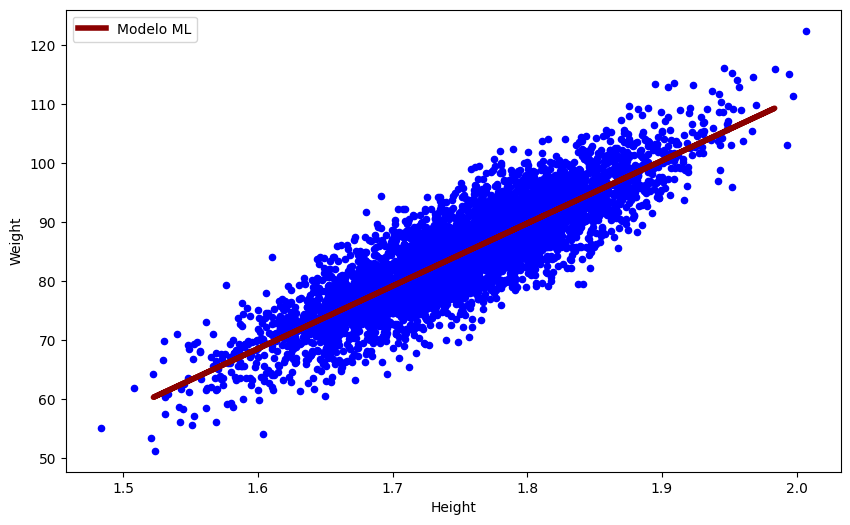

In [52]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()
df2[df2['Gender']=='masculino'].plot.scatter(x='Height',y='Weight', color='b', ax=ax)
ax.plot(x_masculino_test, y_masculino_prueba, color='darkred', label="Modelo ML",linewidth=4)
ax.legend()
plt.show()

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">